# Introduction 

We want today to create a model that can predict the air pollution concentration related to the meteo. We would take data from a specific area in Toulouse. We can see on the map. 


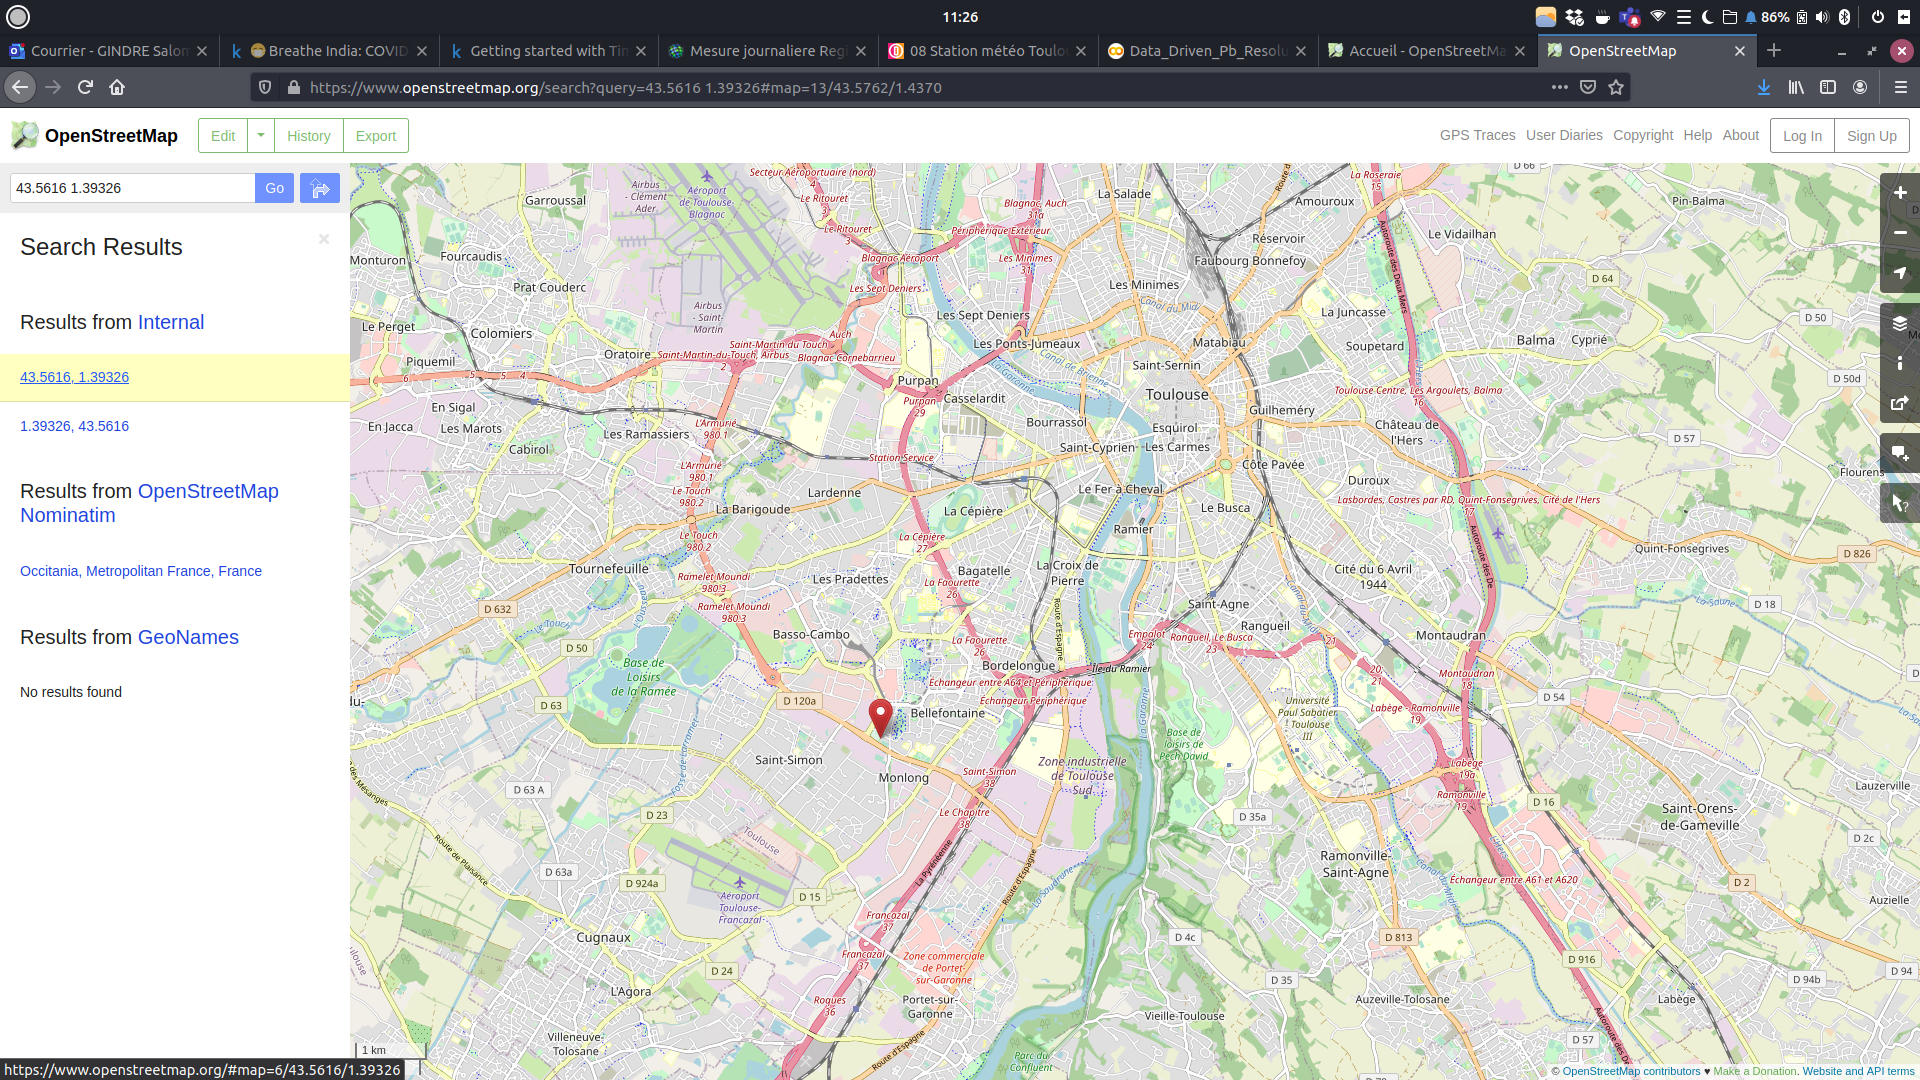

In [ ]:
# afficher image 
from IPython.display import Image
Image('/content/Screenshot from 2020-12-16 11-26-24.png',width=800, height=500)

We have then to load the data from the meteo and the data from the pollution in the air. 
> https://data.toulouse-metropole.fr/explore/dataset/08-station-meteo-toulouse-basso-cambo/information/ 

> https://data-atmo-occitanie.opendata.arcgis.com/datasets/2ab16a5fb61f42c1a689fd9cc466383f_0/data?geometry=-2.860%2C42.386%2C7.556%2C45.162&page=2 

In these large amount of data we would have to select only a small set and to create a prediction model. Through the different days and months the meteo can influence the air concentration of pollution. That's what we want to find out and to predict. 

First, we would clean the two different dataset. Then we would think about the best way to create our model by comparing different libraries like fastai, keras or others. After choosing the optimal option for our project, we would create our model. 

We want then a prediction model with some specific carasteristics and we would want to find ways to optimize it. 

Finally we would test our model with other data, maybe another area close to the one we choose. 





<font color='green'>Summary</font>

1.   Processing data
2.   The model
3.   Test of the prediction model
4.   Conclusion

# Importation 

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sb

import os

# First model choice
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Second model choice
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.gofplots import qqplot


from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

import seaborn as sns


# Pollution data 

## Set up of the target 

In this section, we want to clean, format and frame our dataset in order to use it for our model of prediction. We want to select only what we are interested in a very large amount of data. We would start with the pollution of the air dataset. In this dataset, we want the columns of the location (longitude, latitude) and the chemicals product of pollution present in the area targetted.In the rows we only want to select the place where we would work in. It would be Toulouse - SETMI. 

> Then after cleaning the data, we can plot the target wanted. 

## Load the data 

In [ ]:

#data = pd.read_csv('/content/drive/MyDrive/Air_Meteo/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv')
data=pd.read_csv("/content/sample_data/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv")

print(data.head(10))

          X        Y nom_dept  ...   x_l93    y_l93 ObjectId
0  0.179722  43.6303     GERS  ...  472377  6285316        1
1  3.898610  43.6100  HERAULT  ...  772566  6279407        2
2  3.503030  44.5220   LOZERE  ...  739976  6380453        3
3  3.503030  44.5220   LOZERE  ...  739976  6380453        4
4  3.503030  44.5220   LOZERE  ...  739976  6380453        5
5  3.503030  44.5220   LOZERE  ...  739976  6380453        6
6  3.898610  43.6100  HERAULT  ...  772566  6279407        7
7  3.503030  44.5220   LOZERE  ...  739976  6380453        8
8  3.503030  44.5220   LOZERE  ...  739976  6380453        9
9  3.898610  43.6100  HERAULT  ...  772566  6279407       10

[10 rows x 20 columns]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49360 entries, 0 to 49359
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X             49360 non-null  float64
 1   Y             49360 non-null  float64
 2   nom_dept      49360 non-null  object 
 3   nom_com       49360 non-null  object 
 4   insee_com     49360 non-null  int64  
 5   nom_station   49360 non-null  object 
 6   code_station  49360 non-null  object 
 7   typologie     49360 non-null  object 
 8   influence     49360 non-null  object 
 9   nom_poll      49360 non-null  object 
 10  id_poll_ue    49360 non-null  int64  
 11  valeur        49360 non-null  float64
 12  unite         49360 non-null  object 
 13  metrique      49360 non-null  object 
 14  date_debut    49360 non-null  object 
 15  date_fin      49360 non-null  object 
 16  statut_valid  49360 non-null  object 
 17  x_l93         49360 non-null  int64  
 18  y_l93         49360 non-nu

What we want to keep is the city of Toulouse and the place named Toulouse - SETMI. When we read the data we can also see that the only chemical polluting product present is the PM10. 

### Selection of the columns and rows

In [ ]:
setmi1='FR50040'
setmi2='FR50039'
pol="PM10"

In [ ]:
data=pd.concat([data[data["code_station"]==setmi1],data[data["code_station"]==setmi2]])
data=data[data["nom_poll"]==pol]

In [ ]:
data.head()

,X,Y,nom_dept,nom_com,insee_com,nom_station,code_station,typologie,influence,nom_poll,id_poll_ue,valeur,unite,metrique,date_debut,date_fin,statut_valid,x_l93,y_l93,ObjectId
156,1.40392,43.5564,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-SETMI Chapitre Industriel,FR50040,Urbaine,Industrielle,PM10,5,16.8,ug.m-3,journaliere,2019/12/28 00:00:00+00,2019/12/28 23:59:00+00,t,570997,6274342,157
370,1.40392,43.5564,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-SETMI Chapitre Industriel,FR50040,Urbaine,Industrielle,PM10,5,20.1,ug.m-3,journaliere,2020/02/19 00:00:00+00,2020/02/19 23:59:00+00,t,570997,6274342,371
479,1.40392,43.5564,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-SETMI Chapitre Industriel,FR50040,Urbaine,Industrielle,PM10,5,9.3,ug.m-3,journaliere,2019/12/29 00:00:00+00,2019/12/29 23:59:00+00,t,570997,6274342,480
578,1.40392,43.5564,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-SETMI Chapitre Industriel,FR50040,Urbaine,Industrielle,PM10,5,13.2,ug.m-3,journaliere,2019/12/30 00:00:00+00,2019/12/30 23:59:00+00,t,570997,6274342,579
867,1.40392,43.5564,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-SETMI Chapitre Industriel,FR50040,Urbaine,Industrielle,PM10,5,25.6,ug.m-3,journaliere,2019/12/31 00:00:00+00,2019/12/31 23:59:00+00,t,570997,6274342,868


## Format the data 

In [ ]:
date=data['date_debut'].apply(lambda x : pd.to_datetime(x).date())
data=pd.DataFrame({"PM10":np.asarray(data['valeur']),"date":np.asarray(date)})

In [ ]:
data.head()

,PM10,date
0,16.8,2019-12-28
1,20.1,2020-02-19
2,9.3,2019-12-29
3,13.2,2019-12-30
4,25.6,2019-12-31


# Meteo data 

## Load the data

In [ ]:
df_m=pd.read_csv("/content/sample_data/08-station-meteo-toulouse-basso-cambo.csv",sep=';')

## Select columns and raws 







In [ ]:
df_m=df_m.drop(columns=['data','id','type_de_station','heure_utc'])

## Format the data 

In [ ]:
df_m['heure_de_paris']=df_m['heure_de_paris'].apply(lambda x : pd.to_datetime(x).date())
df_m=df_m.groupby(['heure_de_paris']).mean()
df_m['date']=df_m.index
df_m.index=range(len(df_m))

# Data merging

In [ ]:
df_m['date']=df_m['date'].apply(lambda x : str(x))
data['date']=data['date'].apply(lambda x : str(x))


df=data.merge(df_m,right_on='date',left_on='date' ,how='inner')

In [ ]:
df.head()

,PM10,date,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature
0,16.8,2019-12-28,89.510417,4.645833,0.020833,101390.625000,45.562500,0.0,104.531250,0.364583,2.020833,8.198958
1,16.1,2019-12-28,89.510417,4.645833,0.020833,101390.625000,45.562500,0.0,104.531250,0.364583,2.020833,8.198958
2,20.1,2020-02-19,79.145833,8.489583,0.000000,101363.541667,72.166667,0.0,191.015625,3.333333,8.562500,8.176042
3,22.6,2020-02-19,79.145833,8.489583,0.000000,101363.541667,72.166667,0.0,191.015625,3.333333,8.562500,8.176042
4,9.3,2019-12-29,85.947917,3.885417,0.014583,101342.708333,12.062500,0.0,87.421875,2.656250,8.770833,7.296875


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 0 to 708
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PM10                                        709 non-null    float64
 1   date                                        709 non-null    object 
 2   humidite                                    709 non-null    float64
 3   direction_du_vecteur_de_vent_max            709 non-null    float64
 4   pluie_intensite_max                         709 non-null    float64
 5   pression                                    709 non-null    float64
 6   direction_du_vecteur_vent_moyen             709 non-null    float64
 7   pluie                                       709 non-null    float64
 8   direction_du_vecteur_de_rafale_de_vent_max  709 non-null    float64
 9   force_moyenne_du_vecteur_vent               709 non-null    float64
 10  force_rafale_m

**Missing values**

We want first to check if there is any missing value in the dataset. 

In [ ]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## Plot 

**Checking the data availability**

In [ ]:
print(f"The available data is between {df['date'].min()} and {df['date'].max()}")


The available data is between 2019-12-18 and 2020-12-15


**Plot the concentration of the pollution**

In [ ]:
df1 = df.copy()

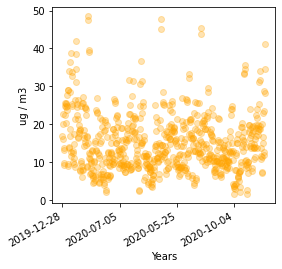

In [ ]:
df1.set_index('date',inplace=True)
axes = df1['PM10'].plot(marker='o', color="orange", alpha=0.3, linestyle='None', figsize=(4, 4), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

In [ ]:
"""data.reset_index(inplace=True)
df = data.copy()
value='PM10'
fig = trend_plot(df,value)
print(fig)
"""

"data.reset_index(inplace=True)\ndf = data.copy()\nvalue='PM10'\nfig = trend_plot(df,value)\nprint(fig)\n"

# Reflexion on the model 

This project is about prediction of a concentration of PM10 according to the weather. After having cleaned the data, we have now a dataset ready to be processed. 

The challenge of this project was the time. The targetted data, which was the concentration of PM10, is changing through time. So the time is an important factor in our prediction model. We have then to find a way to do some Time Series Analysis on our dataset. 

In order to do so, we thought about two kind of model. The first one is the **Random Forest**. 

This model is an intersting way of predicting a target according to a few features. The model bases its information on the features selected in order to guess the values of the target. In the next section will then be introduced this method and our the model would be trained and tested. Let's see the result. 

The second model selected for this project is the **ARIMA** model. This model would help us to forecast our dataset. We will use the time as an essential variable. We would then do some time series analysis. In brief, time series is a sequence where a metric is recorded over regular time intervals. And forecasting is the next step where you want to predict the future values series is going to take. 

# The models 

In this section we will built our two different models, test them and then compare their results. We will conclude this project by choosing the more efficient one with the best accuracy. 

## Model 1 : Random Forest

### Introduction 

**The Random Forest**



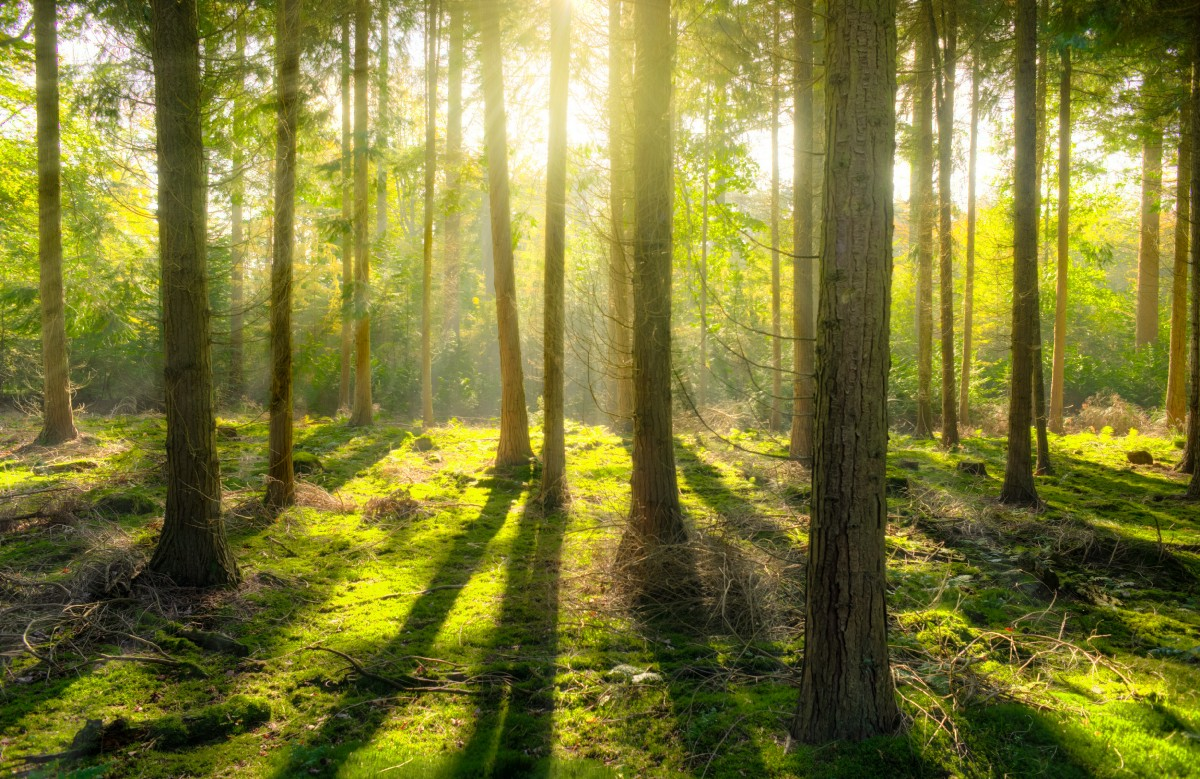

In [ ]:
Image('/content/1*IC7_pdLtDMqwoqLkTib4JQ.jpeg')

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. Random forest is a supervised learning algorithm. 

The reason for this gerat effect is that the trees protect each other from their individual errors. While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction. So the prerequisites for random forest to perform well are:

* There needs to be some actual signal in our features so that models built using those features do better than random guessing.

* The predictions (and therefore the errors) made by the individual trees need to have low correlations with each other. 



**About the data**



The random forest model is asking us to choose the best features possible. Those features must be selected carefully and respect the goals of the project. 

After having done a few tests, the selected features which would be the more adequat to our needs would be : 

    The Humidity, the Temperature and the "force moyenne du vecteur vent"



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 0 to 708
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PM10                                        709 non-null    float64
 1   date                                        709 non-null    object 
 2   humidite                                    709 non-null    float64
 3   direction_du_vecteur_de_vent_max            709 non-null    float64
 4   pluie_intensite_max                         709 non-null    float64
 5   pression                                    709 non-null    float64
 6   direction_du_vecteur_vent_moyen             709 non-null    float64
 7   pluie                                       709 non-null    float64
 8   direction_du_vecteur_de_rafale_de_vent_max  709 non-null    float64
 9   force_moyenne_du_vecteur_vent               709 non-null    float64
 10  force_rafale_m

In this part we will split the data into 2 differents data set :

- One for the train phasis of the Algorithm

- One for the test phasis of the Algorithm

Normally we should separate it randomly and even make test to be sure that the two set are representative and maximise the score of the algorithm. But for the Time Series analysis we need to predict the "end" of the data set (the last values) so we will split the test set like the 20% of the last data et the train set as 80% of the "first" data.

It could also be intresting to test the random forest on optimise test and train data set but we couldn't compare his result with thoose of Forecasting so we won't choose this option.

We need to separate before the training, the dataset into two different datasets. We will not do the validation for this part. 

We take then aroung 70% of the initial dataset for the train and 30% of the dataset for the test. 




In [ ]:
training, test = df[:500], df[500:]
print('the training set is : \n', training)
print('the test set is : \n', test)

the training set is : 
      PM10        date  ...  force_rafale_max  temperature
0    16.8  2019-12-28  ...          2.020833     8.198958
1    16.1  2019-12-28  ...          2.020833     8.198958
2    20.1  2020-02-19  ...          8.562500     8.176042
3    22.6  2020-02-19  ...          8.562500     8.176042
4     9.3  2019-12-29  ...          8.770833     7.296875
..    ...         ...  ...               ...          ...
495  22.4  2020-03-23  ...         17.291667    12.790625
496  18.7  2020-03-24  ...         18.322917    11.836458
497  18.7  2020-03-24  ...         18.322917    11.836458
498   9.3  2020-04-24  ...          7.062500    16.181250
499  10.8  2020-04-24  ...          7.062500    16.181250

[500 rows x 12 columns]
the test set is : 
      PM10        date  ...  force_rafale_max  temperature
500  13.6  2020-03-25  ...         15.635417    10.725000
501  14.7  2020-03-25  ...         15.635417    10.725000
502  10.8  2020-03-26  ...         11.572917     6.958333
503

**Builing the model**

In [ ]:
RF = RandomForestRegressor()

**Train the model**

In [ ]:
RF.fit(training[['humidite', 'temperature', 'force_moyenne_du_vecteur_vent']], training['PM10'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
training['PM10_train'] = RF.predict(training[['humidite', 'temperature', 'force_moyenne_du_vecteur_vent']])

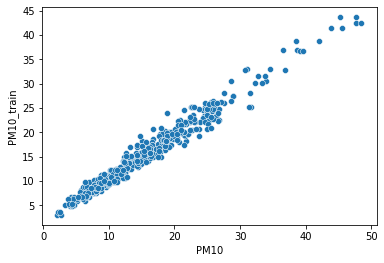

In [ ]:
sns.scatterplot(data=training, x="PM10", y="PM10_train")

Our model seems correct and good. We can see thanks to the plot that the prediction is fitting with the initial data. 

We have a collection of 500 results. 

In [ ]:
(training['PM10_train'] / training['PM10']).describe()

count    500.000000
mean       1.033928
std        0.123889
min        0.792456
25%        0.951405
50%        1.012379
75%        1.090552
max        1.680079
dtype: float64

We want now to see with a tolerance of 25% the amount of right and wrong answers. We will then calculate the accuracy of our model for the trained model. 

In [ ]:
training['PM10_good'] = (training['PM10_train'] /training['PM10']).between(0.75, 1.25)

In [ ]:
training['PM10_good'].value_counts()

True     474
False     26
Name: PM10_good, dtype: int64

We can see that the model has guessed 471 right answers and 29 wrong answers. 

**Test**

We will then here test our model. We want to check the accuracy and if the result are efficient even if the model is not overfitting. 

In [ ]:
test['PM10_pred_RF'] = RF.predict(test[['humidite', 'temperature', 'force_moyenne_du_vecteur_vent']])

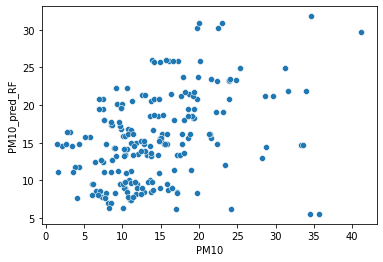

In [ ]:
# Plot Pred/Reel
sns.scatterplot(data=test, x="PM10", y="PM10_pred_RF")

We can see that the data are really far from the line y=x which is the desired result. 

In [ ]:
# Some stats about the Pred/Real
(test['PM10_pred_RF'] / test['PM10']).describe()

count    209.000000
mean       1.386903
std        1.141194
min        0.156141
25%        0.831106
50%        1.069954
75%        1.542142
max        9.882778
dtype: float64

We can see that in mean the prediction is more than 50% of differents of the real data so this isn't good

In [ ]:
#number of prediction around 25% of the real value
test['PM10_good'] = (test['PM10_pred_RF'] /test['PM10']).between(0.75, 1.25)
test['PM10_good'].value_counts()

False    125
True      84
Name: PM10_good, dtype: int64

Around 40% of prediction are around 25% of the real data.

In [ ]:
# Precision global
test['RF_diff']=(test['PM10_pred_RF'] - test['PM10']).apply(np.abs)
test['RF_diff'].describe()

count    209.000000
mean       5.442516
std        4.819927
min        0.004600
25%        1.628017
50%        3.934517
75%        8.286750
max       30.041379
Name: RF_diff, dtype: float64

In [ ]:
print(test['RF_diff'].mean())

5.442516142629297


In mean each prediction is far from the the reality of 6.3 which is a lot.

We try here to calculate the accuracy of the model. 

In [ ]:
"""count = 0

for i in range (len(test)):
  if test['PM10_pred_RF'][i] == test['PM10'][i]: 
    count +1

  else:
    print('0')
return count

accuracy_test = count/
"""

"count = 0\n\nfor i in range (len(test)):\n  if test['PM10_pred_RF'][i] == test['PM10'][i]: \n    count +1\n\n  else:\n    print('0')\nreturn count\n\naccuracy_test = count/\n"

### Conclusion

The Random Forest haven't enought precision and is not a good model for our problem.

The precision and the number of good prediction is too low.

## Model 2 : ARIMA

**Introduction**

The Time Series analysis can be applied in a probleme where the data are changing in time, we thought this Problem could be the perfect exemple.

The data are analyse with their frequency, their cycle and their variation by the model and after this he can make a prediction of the following sequences. This model isn't taking in account the meteo data or any other data than the variationn of PM10 in time.

ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

An ARIMA model is characterized by 3 terms: p, d, q where

- p is the order of the AR term

- q is the order of the MA term

- d is the number of differencing required to make the time series stationary

AR is a linear regression model applied on lags of the model (on previous entry) while MA is the same but on the error of the lags

ARIMA model in words:


Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

ARIMA is finally a merge of 2 models (AR ans MA) applyed to a Stationnary data (I) to make forcasting 



In [ ]:
Image('/content/136625564_834883557368019_8910471770918561893_n.jpg',width=800, height=500)

**About the data** 

In [ ]:
df2 = df.copy()
df2.head()

In [ ]:
plt.plot(df2['date'],df2['PM10'])

**Log-transform**


The log transformation is used to convert time series that are nonstationary with respect to the innovation variance into stationary time series. The approach is to take the log of the series in a DATA step and then apply the ARIMA model without I (the part making the transformation to stationnary function) to the transformed data. A DATA step is then used to transform the forecasts of the logs back to the original units of measurement. The confidence limits are also transformed by using the exponential function.

So in few words this part is to transform the data into a stationnary series to applied ARIMA easely

In order to settle our model, we will log-transform this time series

    xt' = ln(xt)
    
Then on this log-transformed time series, differentiate it following this logic: 

    x''t = x't-x'(t-1) 
    
(use the diff() function from pandas DataFrame; keep in mind the first value of this differenciation will be N/A)

In [ ]:
df2['log_val'] = np.log(df2['PM10'])
plt.plot(df2['date'],df2['log_val'])



Observation : The courb is now more straight but still have to much variantion and isn't focus around 0

In [ ]:
df2['diff_log_val'] = df2['log_val'].diff(1)
df2.head()

In [ ]:
plt.plot(df2['date'],df2['diff_log_val'])

The Differenciation has removed a possible trend. It is not perfect but we could say that this time series starts to look like coming from a stationary process, therefore we could think of searching for a AR or MA process.

**ACF & PACF**

Now we want to determine the parameters of the arima models so we will use Autocorrelation function and Partial AutoCorrelation Function to do this

ACF  describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’. This will give us the parameter for MA

PACF instead of finding correlations of present with lags like ACF, PACF finds correlation of the residuals with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. This will give us the parameter for AR

In [ ]:
# note how here you should explicitely discard the first row (being N/A)
fig_acf = plot_acf(df2['diff_log_val'].iloc[1:len(df2)])
fig_pacf = plot_pacf(df2['diff_log_val'].iloc[1:len(df2)])

To choose the right parameters we need to focus on the value outside the blue area, the value under are not significant, in this case we can choose to have 

- p : 1
- q : 1
- i : 0

It's better to have less than more so for security we will choose 1 but 3 can be considerate for the both.


**Model ARIMA**

    ARIMA -- Autoregressive integrated moving average  

ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values. ARIMA models aim to describe the autocorrelations in the data. 

ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

ARIMA models are applied in some cases where data show evidence of non-stationarity in the sense of mean (but not variance/autocovariance), where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity of the mean function. 


An ARIMA model is characterized by : 
* the parameter of the AR (Auto-Rgressive model)
* the parameter of the MA (Moving Average model)
* the number of differencing required to make the time series stationary


ARIMA model in words:

    Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

In [ ]:
data = df2['diff_log_val'].iloc[1:len(df2)]

model = ARIMA(data,(4,0,0))
results = model.fit()
X = results.fittedvalues

plt.plot(df2['date'].iloc[1:len(df2)], data, label = 'Data')
plt.plot(df2['date'].iloc[1:len(df2)], X, label = 'Model')
plt.legend()
plt.plot()


In [ ]:
print(results.summary())

The model summary reveals a lot of information. The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.

This model seems quite satisfactory on the differenciated log transformed data, so let see it on the initial data. 

**Train and test the model**

In order to validate our model, we will use now the Out-of-Time cross-validation. 

In Out-of-Time cross-validation, you take few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals.

To do out-of-time cross-validation, you need to create the training and testing dataset by splitting the time series into 2 contiguous parts in approximately 75:25 ratio or a reasonable proportion based on time frequency of series.

In [ ]:
print(data)
#train = 0.8*len(data)
#test = data - train
train = data[:500]
test = data[500:]


You can now build the ARIMA model on training dataset, forecast and plot it.

In [ ]:
# Build Model

model = ARIMA(train, order=(4,0,0))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(208, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
print(fitted.summary())

The green line is our forecasting! We succeed to plot it but we don't have a perfect result. We would try to perfect our model. 

**Is the model fitting?**

Another way to verify our model would be to vizualize it. Here we can see the model predicting the value of the log function of the real values and another showing the prediction on the real initial values. 

In [ ]:
# we need to differenciate back the series by starting inversing the differenciation

df2['pred_log'] = 0 # we define a new column to hold these values
df2['pred_log'].iloc[0] = df2['log_val'].iloc[0] # we set the first value as being the initial one so we can start from there

#
for i in range(1,len(df2)):
  df2['pred_log'].iloc[i] = df2['log_val'].iloc[i-1] + X.reset_index(drop=True)[i-1] 


plt.plot(df2['date'], df2['log_val'])
plt.plot(df2['date'], df2['pred_log'])
plt.show()

plt.plot(df2['PM10'])
plt.plot(np.exp(df2['pred_log']))

The result looks good. However you should not be confused with what you see here. It is not a forecast but a model fitting, where all predicted point is based on real past values (so it should not be too far off in any case)

# Conclusion 

In conclusion we have seen two differents model :

The Random forest, which have a good prediction on train data but wrong for the test data set. We can conclude of this that our model have overfit to much and can't predict on new data. To correct this we should try to : have a better train et test data set, better optimisation of features used for the Random Forest.

The Forecasting with Time series, we have seen there the ARIMA model but like the Random forest this havn't been enougth precise. In this case we can conclude after a lot of parameters try that the problem is the model and it's not a cyclic case. In order to go further we should try a SARIMA model which work for non seasonal data and see if we could had the meteo data to the time series model.